Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same", data_format="channels_last")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12

(10000, 28, 28, 1)
(10000, 10)
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 128us/step - loss: 0.1844 - acc: 0.9296 - val_loss: 0.0944 - val_acc: 0.9641
Epoch 2/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0845 - acc: 0.9670 - val_loss: 0.0766 - val_acc: 0.9720
Epoch 3/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0718 - acc: 0.9725 - val_loss: 0.0662 - val_acc: 0.9747
Epoch 4/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0658 - acc: 0.9748 - val_loss: 0.0639 - val_acc: 0.9763
Epoch 5/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0618 - acc: 0.9766 - val_loss: 0.0584 - val_acc: 0.9780
Epoch 6/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0596 - acc: 0.9772 - val_loss: 0.0572 - val_acc: 0.9783
Epoch 7/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.0571 - acc: 0.9

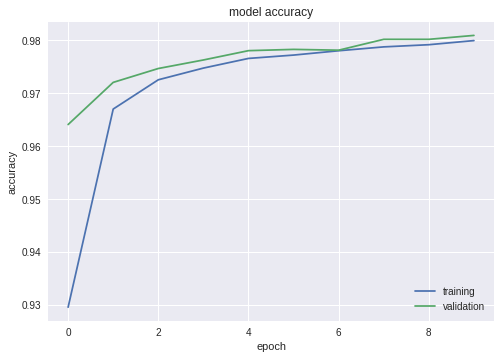

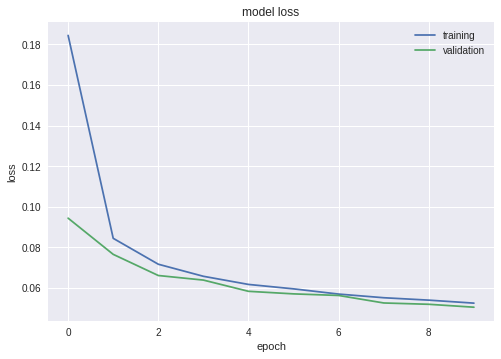

Test loss: 0.05070096884667873
Test accuracy: 0.9809500056266784


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers  import  Flatten, Dense, Activation,Conv2D,MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras import backend as K
from sklearn import metrics
from keras.datasets import fashion_mnist as mnist
(data_Train,Y_Train_),(data_Test,y_Test_)=mnist.load_data()
data_Train=np.array(data_Train)
data_Test=np.array(data_Test)
data_Train = np.expand_dims(data_Train, axis=4)
data_Test=np.expand_dims(data_Test, axis=4)
Y_Train_ = LabelEncoder().fit_transform(Y_Train_)
Y_Train_ = np_utils.to_categorical(Y_Train_)
y_Test_ = np_utils.to_categorical(y_Test_)
data_Valid=data_Train[50000:]
data_Train=data_Train[0:50000]
Y_Valid_=Y_Train_[50000:]
Y_Train_=Y_Train_[0:50000]
print(np.shape(data_Valid))
print(np.shape(Y_Valid_))
Optimizer=Adam(lr=0.01)
objective='binary_crossentropy'
def center_normalize(x):
 return (x-K.mean(x))/K.std(x)
model=Sequential()
#input
model.add(Activation(activation=center_normalize, input_shape=(28, 28,1)))
#convolutional layer
model.add(Conv2D(32,3,3,activation='relu',border_mode='same',dim_ordering='tf'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2),dim_ordering='tf'))
model.add(Conv2D(128,3,3,activation='relu',border_mode='same',dim_ordering='tf'))
#model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2),dim_ordering='tf'))
model.add(Flatten())
# Relumodel.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
# Sigmoid Fully connected layer
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss=objective,optimizer=Optimizer,metrics=['accuracy'])
start_time = time.clock()
history=model.fit(data_Train,Y_Train_,batch_size=1000,epochs=10,shuffle=True,validation_data=(data_Valid,Y_Valid_))
print (time.clock() - start_time, "seconds")
def plot_accuracy(history):
   plt.plot(history.history[ 'acc'])
   plt.plot(history.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['training', 'validation'], loc='lower right')
   plt.show()

def plot_loss(history):
   plt.plot(history.history['loss'])
   plt.plot(history.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['training', 'validation'], loc='upper right')
   plt.show()
score = model.evaluate(data_Valid, Y_Valid_, verbose=0)
# summarize accuracy
plot_accuracy(history)

# summarize loss
plot_loss(history)
print('Test loss:', score[0])
print('Test accuracy:', score[1])